Let's use the Titanic dataset for this example, which is a classic dataset for binary classification problems. The Titanic dataset is available via the seaborn library or can be loaded from other sources. We'll focus on handling common issues such as multicollinearity, class imbalance, and feature scaling.

<ipython-input-1-f511035530ef>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
<ipython-input-1-f511035530ef>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})


Confusion Matrix:
[[104  18]
 [ 27  65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       122
           1       0.78      0.71      0.74        92

    accuracy                           0.79       214
   macro avg       0.79      0.78      0.78       214
weighted avg       0.79      0.79      0.79       214



<ipython-input-1-f511035530ef>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")


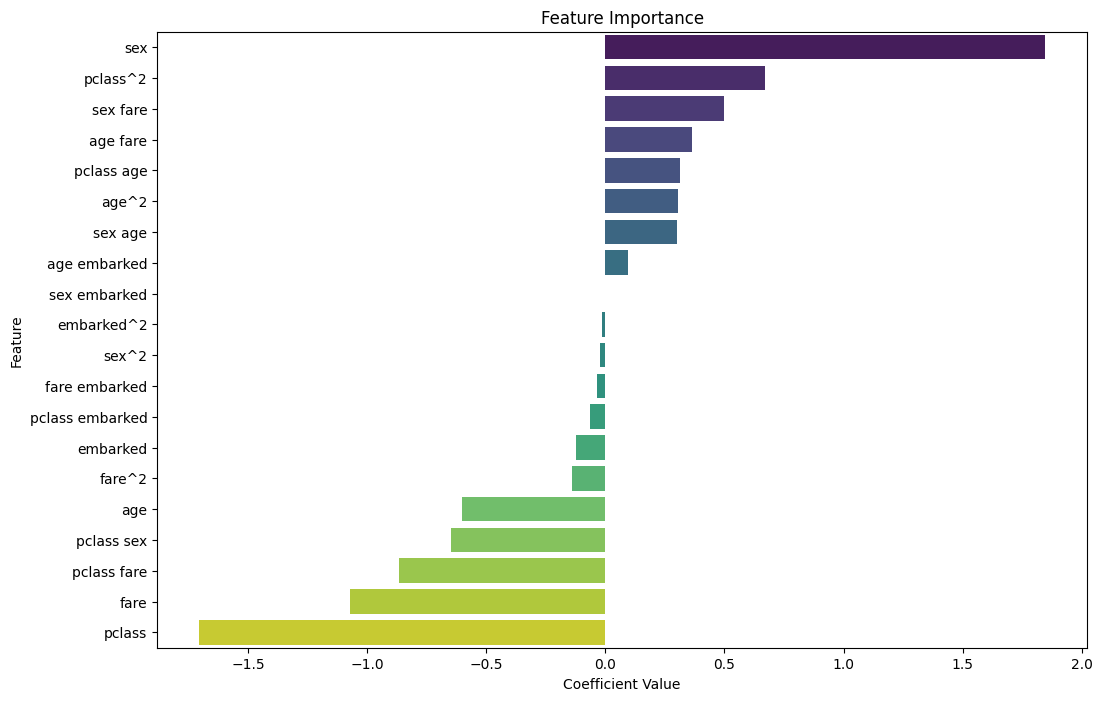

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset('titanic')
titanic = titanic.dropna(subset=['age', 'fare', 'embarked', 'sex', 'pclass'])

# Convert categorical variables to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Define features and target
features = ['pclass', 'sex', 'age', 'fare', 'embarked']
X = titanic[features]
y = titanic['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handling multicollinearity with VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
X_train_selected = selector.fit_transform(X_train)
X_test_selected = selector.transform(X_test)

# Handling class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))

# Logistic Regression with regularization
log_reg = LogisticRegression(class_weight=class_weights_dict, solver='liblinear')

# Feature scaling and polynomial features
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial features
    ('model', log_reg)
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Extract polynomial features
poly_features = pipeline.named_steps['poly'].get_feature_names_out(input_features=X.columns)
coef = pipeline.named_steps['model'].coef_[0]

# Ensure correct length
if len(coef) == len(poly_features):
    feature_importance = pd.Series(coef, index=poly_features).sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="viridis")
    plt.title('Feature Importance')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.show()
else:
    print("Mismatch between number of features and number of coefficients.")


Key Steps in the Code:
1. Load and Preprocess Data: The Titanic dataset is loaded, and missing values are handled by dropping rows with missing values in crucial columns. Categorical variables are converted to numeric.

2. Feature Selection: VarianceThreshold is used to remove features with low variance, which helps mitigate multicollinearity.

3. Class Imbalance: compute_class_weight is used to handle class imbalance by adjusting class weights.

4. Feature Scaling and Polynomial Features: StandardScaler and PolynomialFeatures are used to scale features and capture non-linear relationships.

5. Model Training and Evaluation: The logistic regression model is trained and evaluated with confusion matrix and classification report.

6. Feature Importance Plot: The importance of features is visualized after applying polynomial transformations.